# **Sharvari Lahane**
# **Data Science - Batch May 2024 (Baner, Pune) - Assignment 8**
# **Clustering**

In [1]:
import pandas as pd
import numpy as np

Loading the dataset

In [2]:
data = pd.read_csv('East_West_Airlines.csv')  # Update with the correct path if necessary
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Handling missing values

In [3]:
print(data.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


Assuming mean imputation for any missing values

In [4]:
data.fillna(data.mean(), inplace=True)

Removing outliers

In [5]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

data_cleaned = remove_outliers_iqr(data)

In [6]:
data_cleaned

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Scaling features if necessary

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [8]:
scaler

StandardScaler()

In [9]:
data_scaled

array([[-1.83464329, -0.43885929,  0.        , ..., -0.40970772,
         1.50369284, -0.62307163],
       [-1.83377495, -0.64773487,  0.        , ..., -0.40970772,
         1.48803468, -0.62307163],
       [-1.83290661, -0.1287733 ,  0.        , ..., -0.40970772,
         1.52032964, -0.62307163],
       ...,
       [ 1.65435035,  0.62802805,  0.        , ..., -0.40970772,
        -1.23550729,  1.60495191],
       [ 1.65521869,  0.18915227,  0.        , ...,  1.65318143,
        -1.23599661, -0.62307163],
       [ 1.65608703, -1.02863529,  0.        , ..., -0.40970772,
        -1.23746456, -0.62307163]])

Performing Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting histograms for each feature

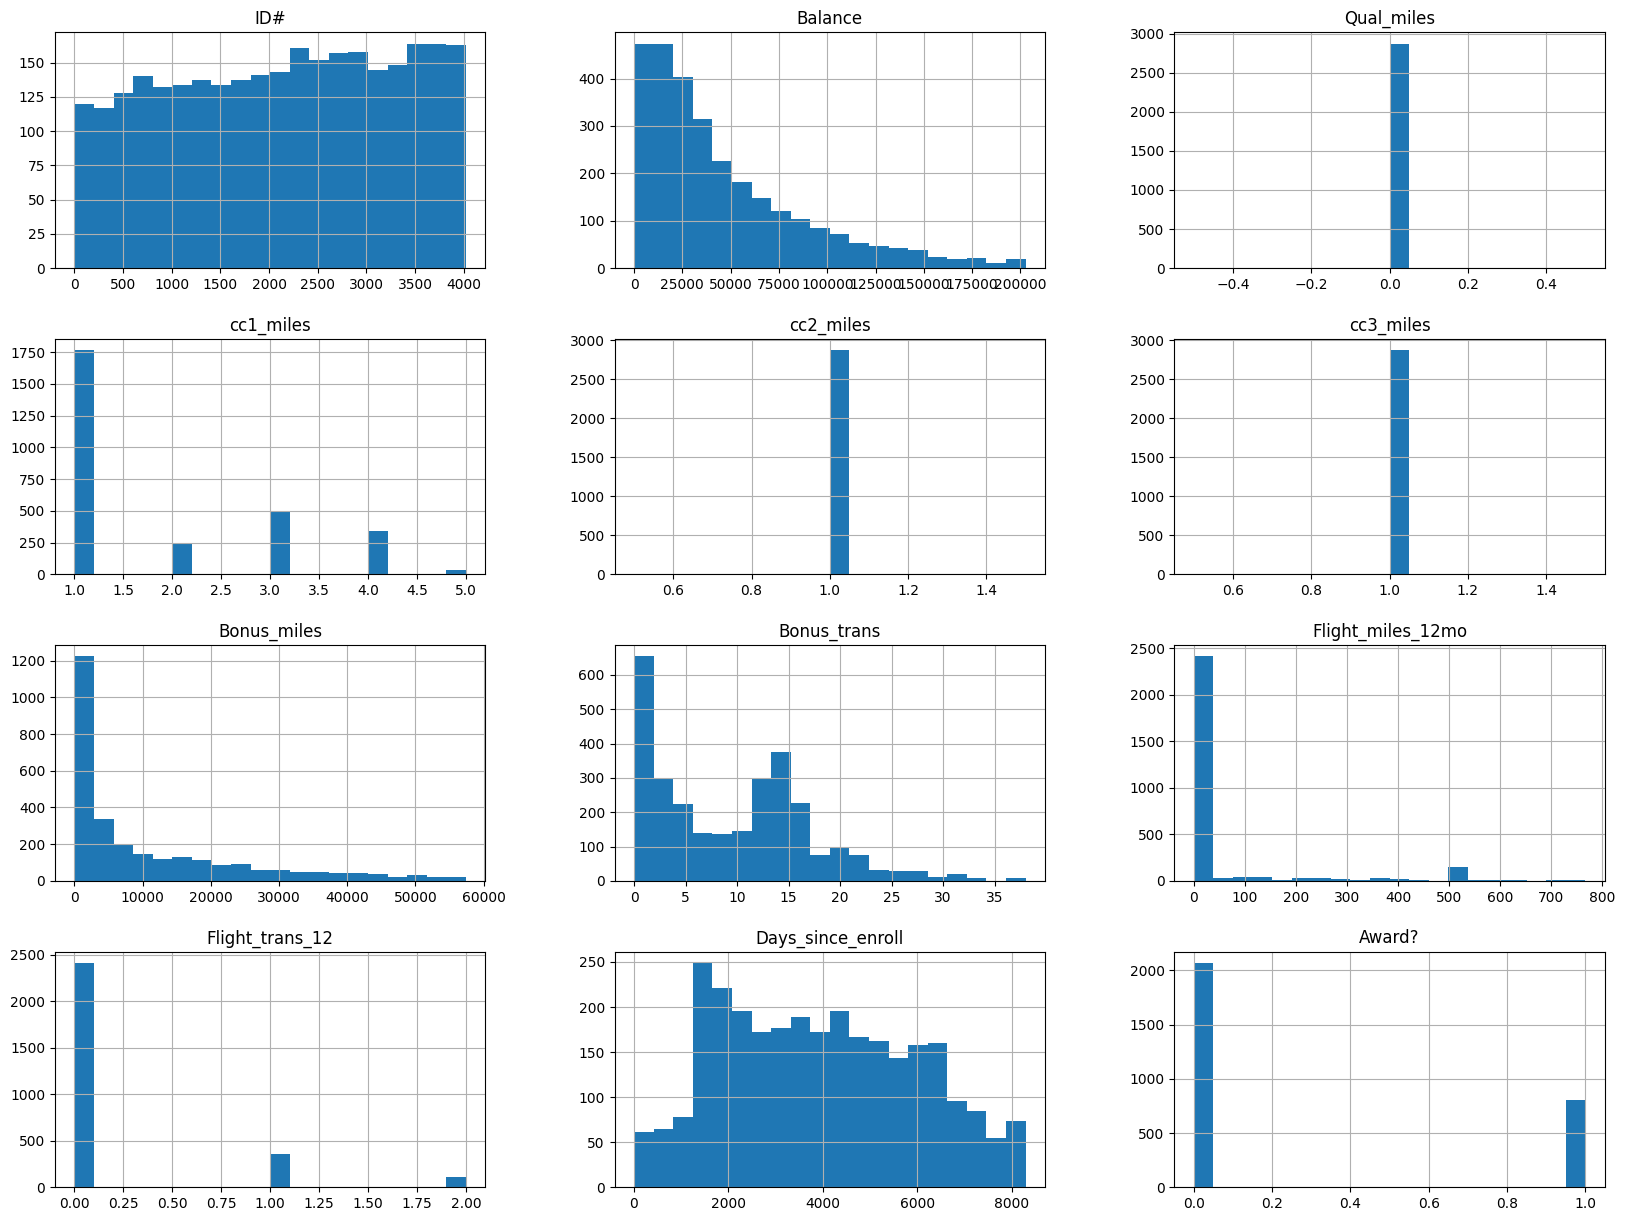

In [11]:
data_cleaned.hist(bins=20, figsize=(20, 15))
plt.show()

Boxplot for each feature to visualize the distribution and identify outliers

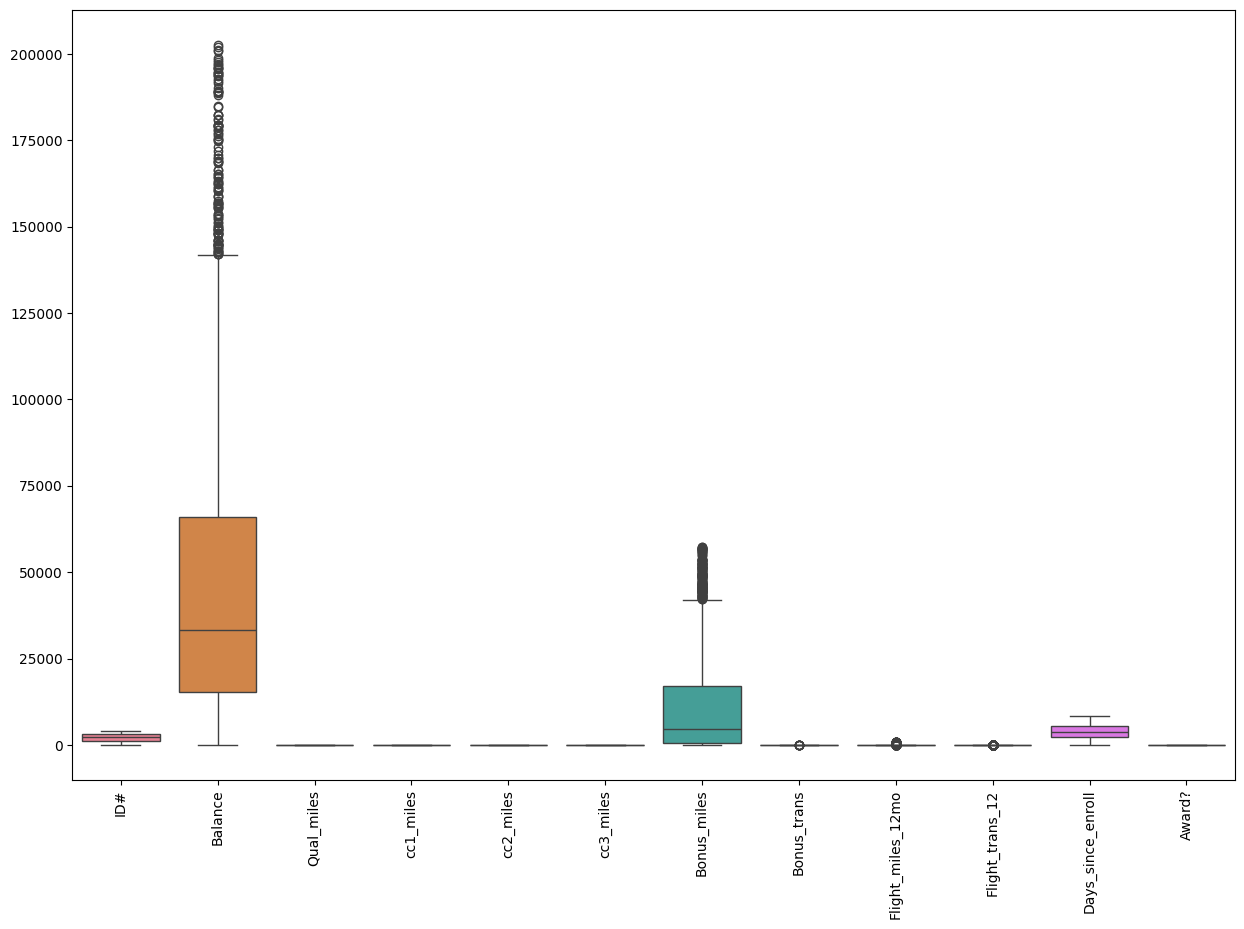

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.show()

Correlation heatmap to see the relationships between variables

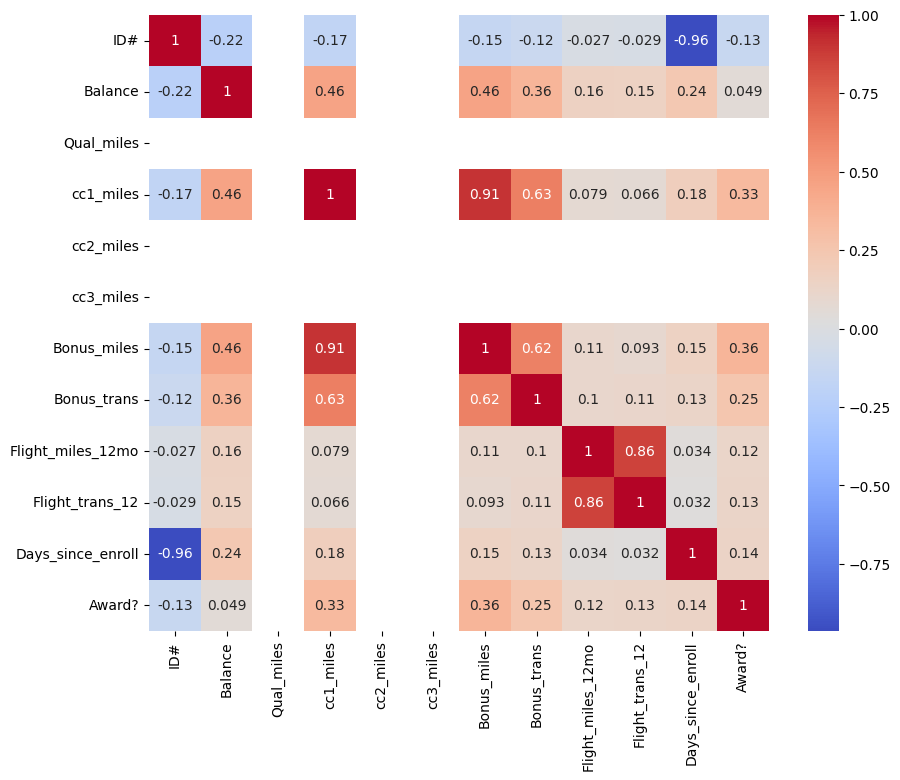

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

**Task 2: Implementing Clustering Algorithms**

Implementing K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Determining the optimal number of clusters using the Elbow method

In [16]:
import warnings
warnings.filterwarnings("ignore")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

Plotting the elbow curve

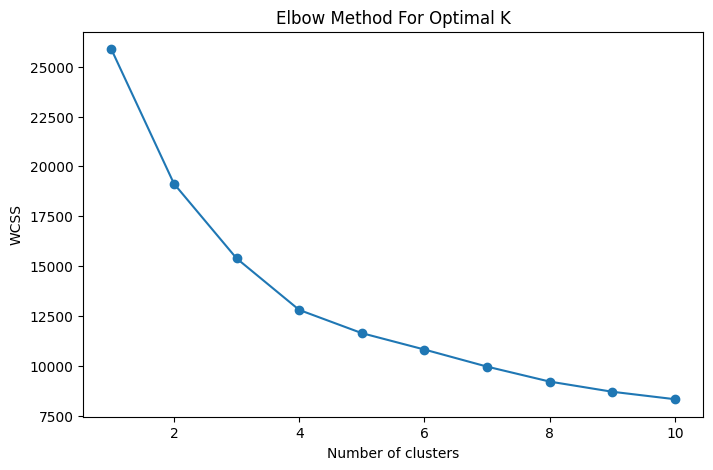

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Applying K-Means with the optimal number of clusters

In [18]:
optimal_k = 4  # Assume 4 based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.2617996550671293


Implement Hierarchical Clustering

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Creating a linkage matrix

In [20]:
linked = linkage(data_scaled, method='ward')

In [21]:
linked

array([[1.84100000e+03, 1.84200000e+03, 4.44758321e-03, 2.00000000e+00],
       [2.65800000e+03, 2.66000000e+03, 6.38902665e-03, 2.00000000e+00],
       [2.62000000e+03, 2.62500000e+03, 9.15594908e-03, 2.00000000e+00],
       ...,
       [5.74000000e+03, 5.74500000e+03, 7.08273542e+01, 1.82200000e+03],
       [5.74300000e+03, 5.74400000e+03, 8.88586434e+01, 1.05300000e+03],
       [5.74600000e+03, 5.74700000e+03, 1.04032086e+02, 2.87500000e+03]])

Plotting the dendrogram

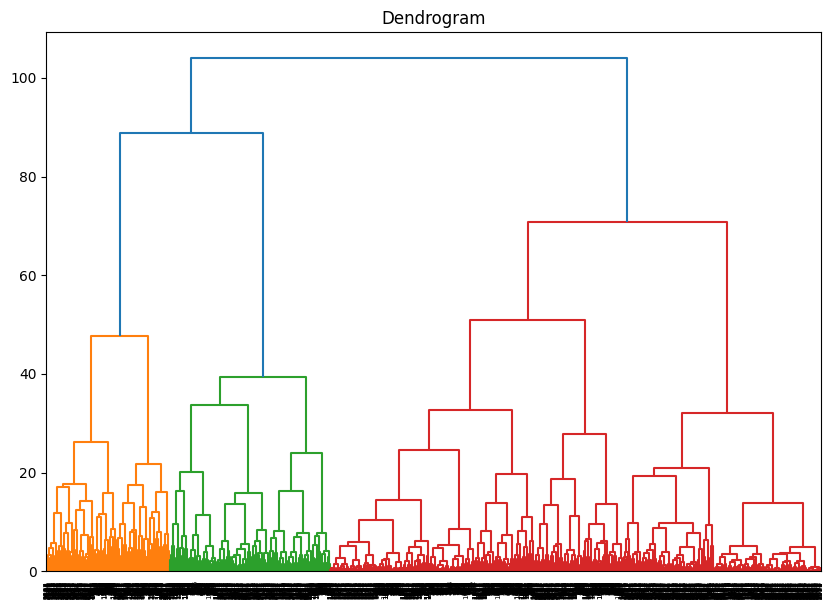

In [22]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

Applying Agglomerative Clustering

In [23]:
hc = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)
silhouette_hc = silhouette_score(data_scaled, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')

Silhouette Score for Hierarchical Clustering: 0.211818801401053


Implement DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

# Experiment with different eps and min_samples values
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: -0.33225832280910966


**Task 3: Cluster Analysis and Interpretation**

In [25]:
data_cleaned['KMeans_Cluster'] = kmeans_labels
data_cleaned['HC_Cluster'] = hc_labels
data_cleaned['DBSCAN_Cluster'] = dbscan_labels

# Group data by clusters and calculate mean for each feature
kmeans_cluster_analysis = data_cleaned.groupby('KMeans_Cluster').mean()
hc_cluster_analysis = data_cleaned.groupby('HC_Cluster').mean()
dbscan_cluster_analysis = data_cleaned.groupby('DBSCAN_Cluster').mean()

print("K-Means Cluster Analysis:\n", kmeans_cluster_analysis)
print("\nHierarchical Clustering Analysis:\n", hc_cluster_analysis)
print("\nDBSCAN Cluster Analysis:\n", dbscan_cluster_analysis)

K-Means Cluster Analysis:
                         ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               1776.786290  76037.352151         0.0   3.348118        1.0   
1               1117.299492  35213.321066         0.0   1.148477        1.0   
2               3182.133267  27699.916834         0.0   1.150301        1.0   
3               2026.339130  65801.310145         0.0   2.078261        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  27155.854839    16.362903           7.411290   
1                     1.0   3292.512690     5.972081           4.928934   
2                     1.0   3490.053106     5.996994           6.087174   
3                     1.0  14429.408696    11.939130         430.860870   

                Flight_trans_12  Days_since_enr

**Task 4: Visualization**

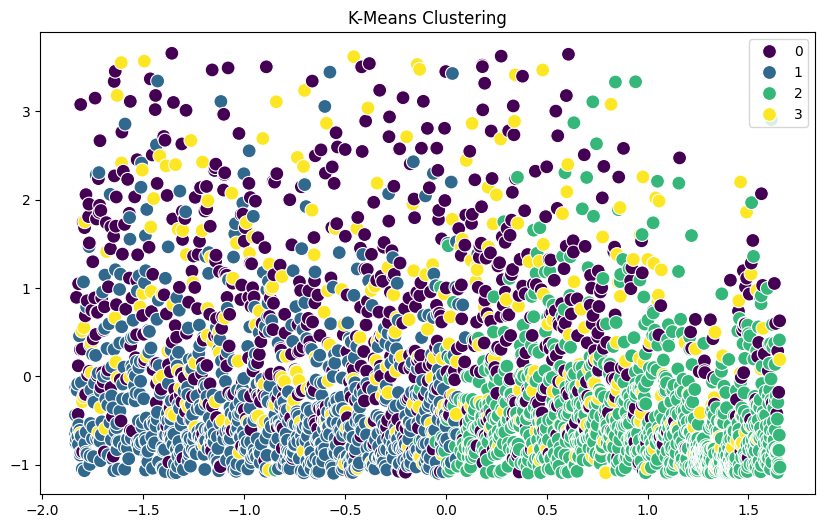

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.show()

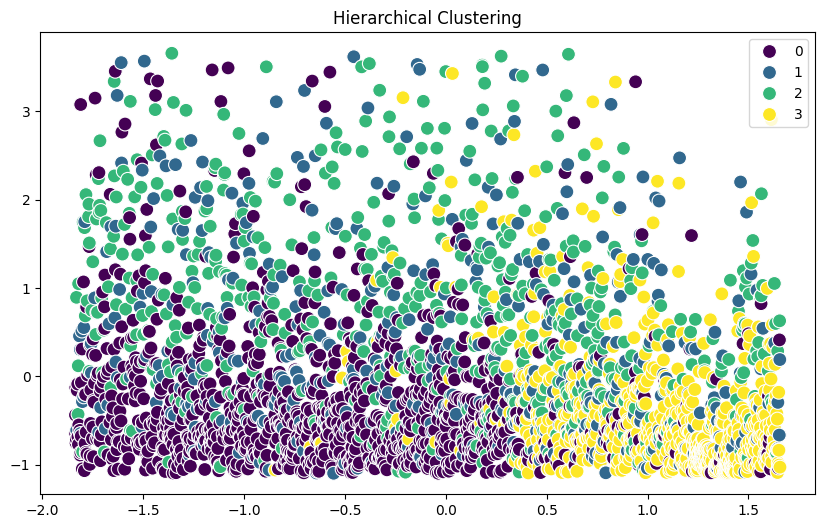

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hc_labels, palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.show()

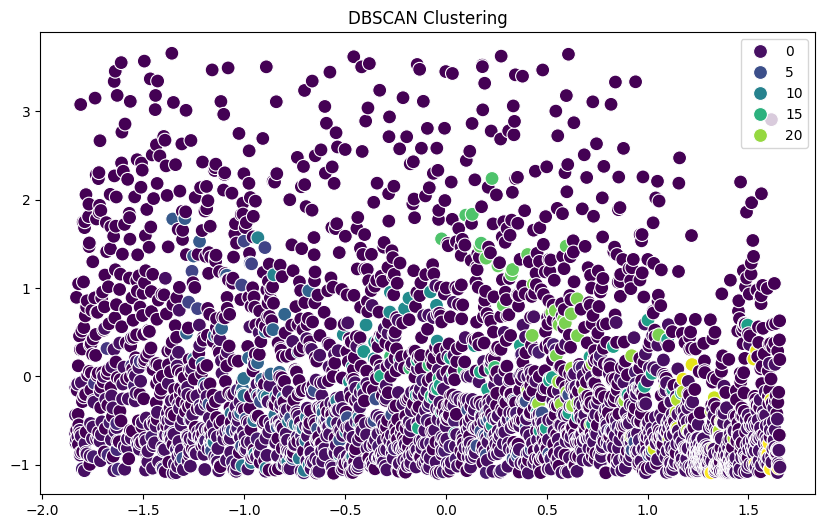

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=dbscan_labels, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.show()

**Task 5: Evaluation and Performance Metrics**

In [29]:
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for K-Means: 0.2617996550671293
Silhouette Score for Hierarchical Clustering: 0.211818801401053
Silhouette Score for DBSCAN: -0.33225832280910966
